In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Observe the data

In [7]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [9]:
# Rename column names

data.columns = [col.lower().replace(" ", "_") for col in data.columns]
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [115]:
# Create two seperate dataframes for the data types.

numericals_df = data.select_dtypes(np.number)
display(numericals_df.head())

categoricals_df = data.select_dtypes(object)
display(categoricals_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [119]:
# Checking the unique values within each of the numerical dataframes to understand if data is continuous or discrete

numericals_df['monthly_premium_auto'].value_counts(dropna=False)

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: monthly_premium_auto, Length: 202, dtype: int64

## Separating Numerical Data

Separate the data between continuous and discrete. This was based on the obversation that there is a clear pattern for discrete values that is based on the policy activities. I considered monthly premium auto to be a discrete since there could be bins within, but checking the data above it looked more discrete values.

In [118]:
continuous_df = numericals_df[['customer_lifetime_value','monthly_premium_auto','income','total_claim_amount']]
discrete_df = numericals_df[['months_since_last_claim','number_of_policies','number_of_open_complaints','months_since_policy_inception']]

display(discrete_df)
display(continuous_df)

,months_since_last_claim,number_of_policies,number_of_open_complaints,months_since_policy_inception
0,32,1,0,5
1,13,8,0,42
2,18,2,0,38
3,18,7,0,65
4,12,1,0,44
...,...,...,...,...
9129,18,2,0,89
9130,14,1,0,28
9131,9,2,3,37
9132,34,3,0,3


,customer_lifetime_value,monthly_premium_auto,income,total_claim_amount
0,2763.519279,69,56274,384.811147
1,6979.535903,94,0,1131.464935
2,12887.431650,108,48767,566.472247
3,7645.861827,106,0,529.881344
4,2813.692575,73,43836,138.130879
...,...,...,...,...
9129,23405.987980,73,71941,198.234764
9130,3096.511217,79,21604,379.200000
9131,8163.890428,85,0,790.784983
9132,7524.442436,96,21941,691.200000


# Correlation Matrix

Looking at the data, we can see there is relatively high-correlation between CLV, monthly premium and total claim amount. This should be factored depending on what the target value is needed.

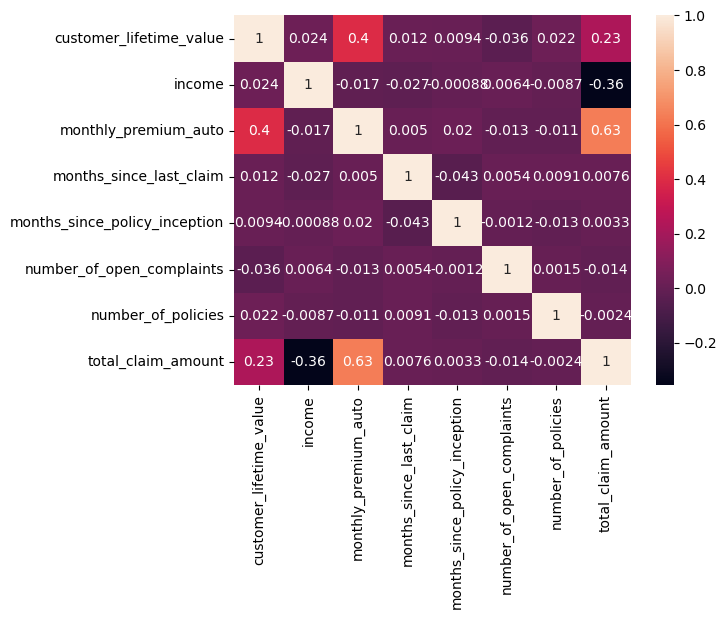

In [117]:
correlations_matrix = numericals_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

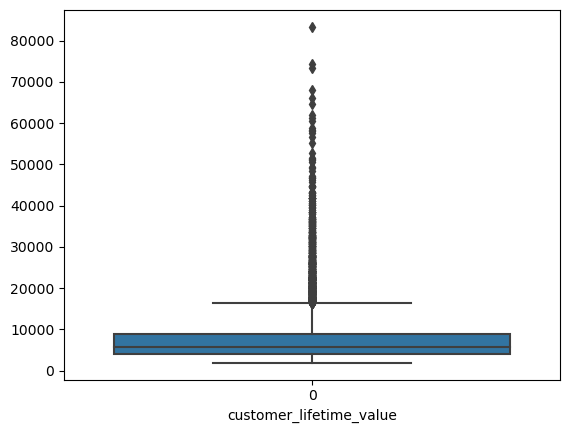

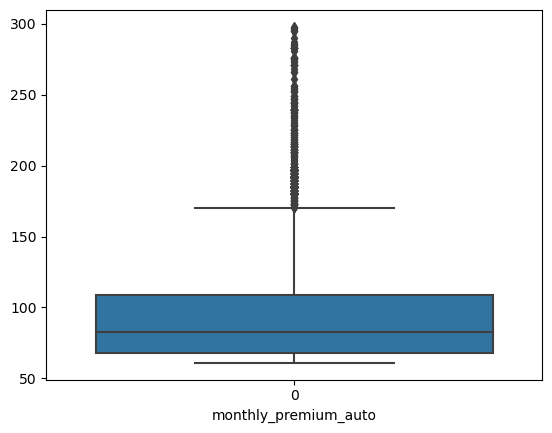

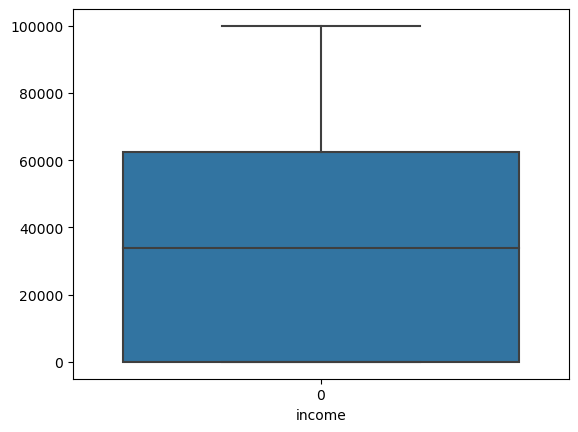

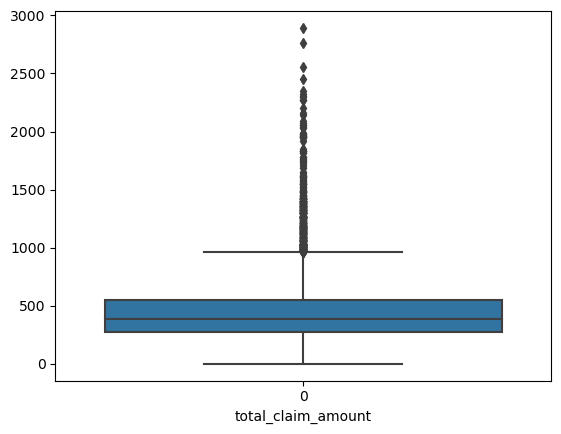

In [102]:
sns.boxplot(continuous_df['customer_lifetime_value'])
plt.xlabel('customer_lifetime_value')
plt.show()

sns.boxplot(continuous_df['monthly_premium_auto'])
plt.xlabel('monthly_premium_auto')
plt.show()

sns.boxplot(continuous_df['income'])
plt.xlabel('income')
plt.show()

sns.boxplot(continuous_df['total_claim_amount'])
plt.xlabel('total_claim_amount')
plt.show()

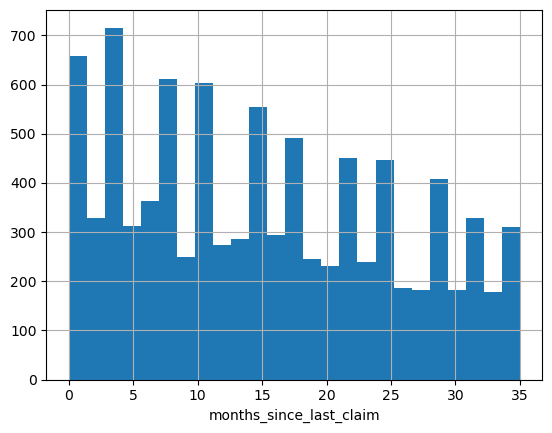

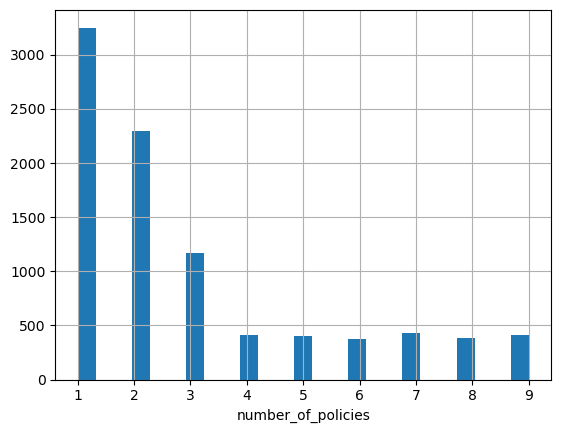

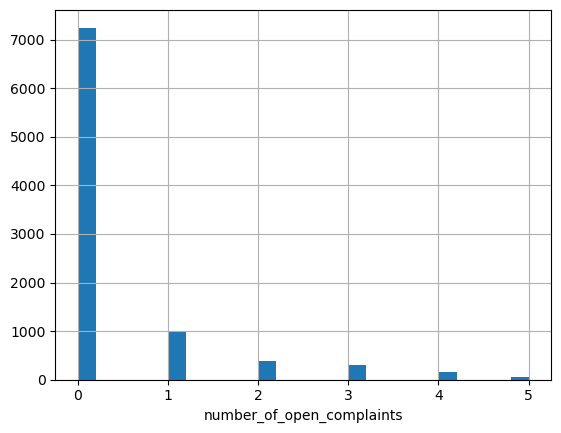

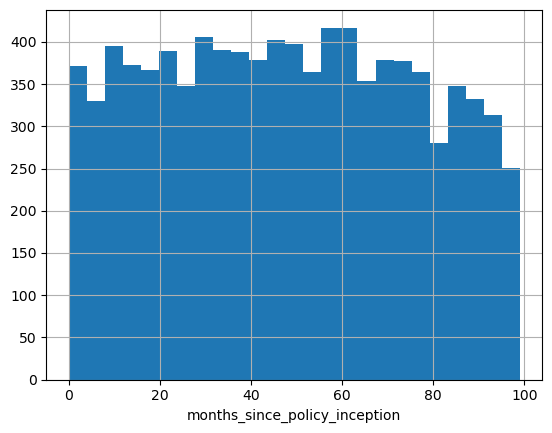

In [104]:
discrete_df['months_since_last_claim'].hist(bins=25)
plt.xlabel('months_since_last_claim') 
plt.show()

discrete_df['number_of_policies'].hist(bins=25)
plt.xlabel('number_of_policies')
plt.show()

discrete_df['number_of_open_complaints'].hist(bins=25)
plt.xlabel('number_of_open_complaints')
plt.show()

discrete_df['months_since_policy_inception'].hist(bins=25)
plt.xlabel('months_since_policy_inception')
plt.show()

In [116]:
# Check for any NaN values

print(numericals_df.isnull().any().any())
print(categoricals_df.isnull().any().any())
print(data.isnull().any().any())

False
False
False


In [120]:
# Intermediate saving

data.to_csv('we_fn_use_c_marketing_customer_value_analysis.csv', index=False)